In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
brain_df = pd.read_csv("brain_stroke.csv")

In [3]:
brain_df.shape

(4981, 11)

In [4]:
brain_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
brain_df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [6]:
brain_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [8]:
brain_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [9]:
brain_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:>

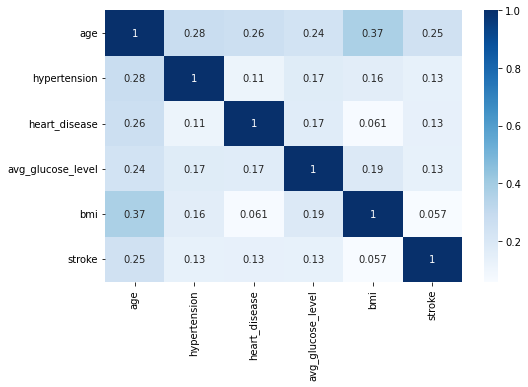

In [10]:
plt.figure(figsize= (8,5))
sns.heatmap(brain_df.corr(), annot=True, cmap='Blues')

In [11]:
brain_df['stroke'].value_counts(normalize = True)*100

0    95.02108
1     4.97892
Name: stroke, dtype: float64

<AxesSubplot:xlabel='stroke', ylabel='count'>

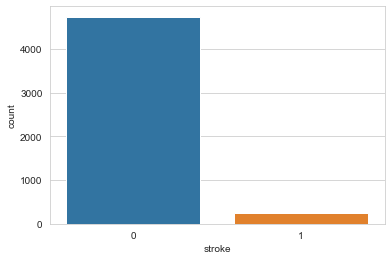

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='stroke',data=brain_df)

<AxesSubplot:ylabel='heart_disease'>

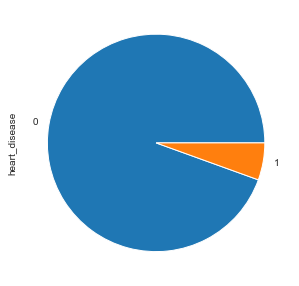

In [14]:
plt.figure(figsize= (10,5))
brain_df.heart_disease.value_counts().plot(kind='pie')

<AxesSubplot:xlabel='age'>

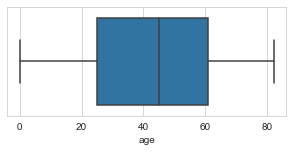

In [14]:
plt.figure(figsize= (5,2))
sns.boxplot(brain_df['age'])

<AxesSubplot:xlabel='stroke', ylabel='hypertension'>

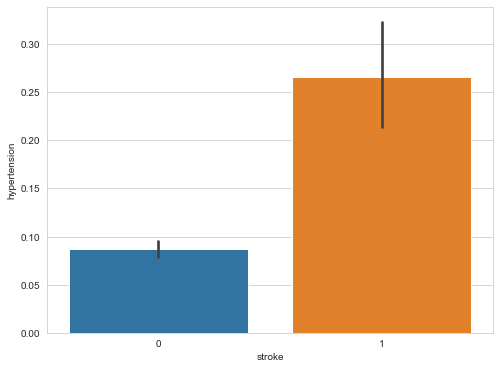

In [15]:
plt.figure(figsize= (8,6))
sns.barplot(y='hypertension', x='stroke', data=brain_df)

<AxesSubplot:xlabel='work_type', ylabel='hypertension'>

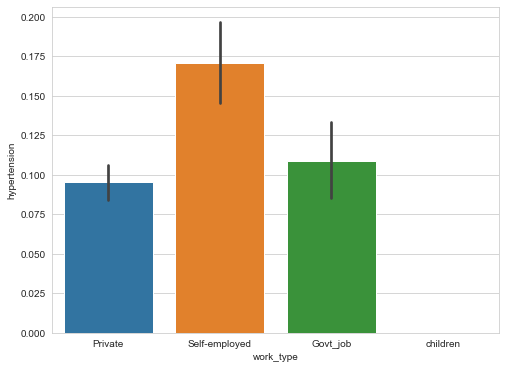

In [16]:
plt.figure(figsize= (8,6))
sns.barplot(x='work_type', y='hypertension', data=brain_df)

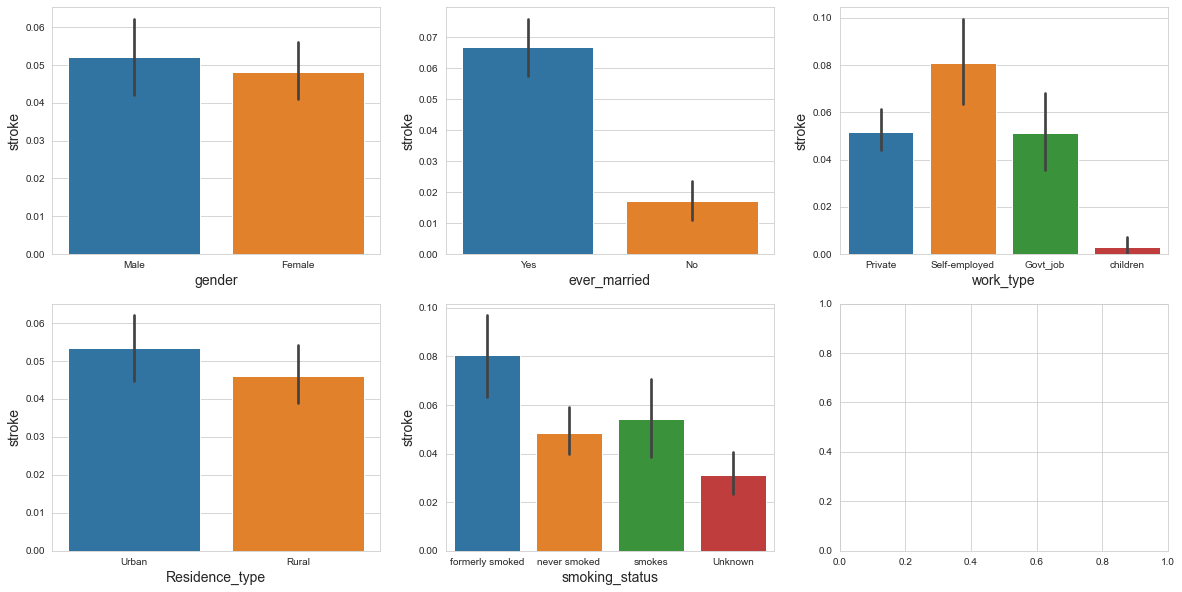

In [17]:
categorical_features=['gender','ever_married','work_type','Residence_type','smoking_status']
fig, axes= plt.subplots(2,3,figsize=(20,10))
axes=[ax for axes_row in axes for ax in axes_row]
target='stroke'
for i, c in enumerate(categorical_features):
    sns.barplot(brain_df[c],brain_df[target],ax=axes[i])
    axes[i].set_ylabel('stroke',fontsize=14)
    axes[i].set_xlabel(c,fontsize=14)
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
brain_df['gender'] = le.fit_transform(brain_df['gender'])
brain_df['ever_married'] = le.fit_transform(brain_df['ever_married'])
brain_df['work_type'] = le.fit_transform(brain_df['work_type'])
brain_df['Residence_type'] = le.fit_transform(brain_df['Residence_type'])
brain_df['smoking_status'] = le.fit_transform(brain_df['smoking_status'])


In [19]:
brain_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [20]:
x=brain_df.drop("stroke",axis=1)
y=brain_df["stroke"]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [31]:
x_train.shape,x_test.shape

((3486, 10), (1495, 10))

In [32]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1574,0,52.0,1,0,1,1,0,213.54,32.0,2
1613,0,53.0,0,0,1,0,0,84.90,21.6,2
3971,1,81.0,0,0,0,1,1,168.68,23.4,1
2177,1,62.0,0,0,1,1,1,145.37,33.3,0
4069,0,75.0,0,0,1,0,1,89.68,38.7,2


In [33]:
x_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
758,0,33.0,0,0,1,1,1,121.04,31.4,0
914,1,35.0,0,0,1,1,1,145.23,32.3,2
3934,0,2.0,0,0,0,3,0,77.72,19.8,0
3000,0,54.0,0,0,1,1,0,109.27,43.8,1
3341,0,62.0,0,0,1,1,0,226.38,47.4,2


In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=6)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=100)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
dtc.fit(x_train,y_train)
pred1 = dtc.predict(x_train)
pred2 = dtc.predict(x_test)

In [52]:
accuracy_score(y_train,pred1)

0.9566838783706254

In [53]:
accuracy_score(y_test,pred2)

0.9438127090301003